En este cuaderno tiene como producto final un gráfico de barras de la sintomatología más común de los casos pediátricos presentados en Sonora en la base de COVID-19 la cual dividimos en dos grupos: de [0,12) y [12,18].

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [15]:
#leemos los datos
df = pd.read_csv("PediatricoSonora.csv",parse_dates=['FECHA_ACTUALIZACION'])

In [16]:
#revisamos las columnas
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [17]:
#damos una revisada solo a las columnas que nos interesan para ver los datos
df[["FECHA_ACTUALIZACION","SEXO","EDAD","MUNICIPIO_RES","FECHA_SINTOMAS","FECHA_DEF","EMBARAZO","DIABETES","ASMA","INMUSUPR","HIPERTENSION",'OTRO_CASO',"RENAL_CRONICA","TABAQUISMO"]]

,FECHA_ACTUALIZACION,SEXO,EDAD,MUNICIPIO_RES,FECHA_SINTOMAS,FECHA_DEF,EMBARAZO,DIABETES,ASMA,INMUSUPR,HIPERTENSION,OTRO_CASO,RENAL_CRONICA,TABAQUISMO
0,2022-02-06,2,4,18,2020-01-01,9999-99-99,97,2,2,2,2,99,2,2
1,2022-02-06,1,1,58,2020-01-01,9999-99-99,2,2,2,2,2,2,2,2
2,2022-02-06,2,15,25,2021-02-06,9999-99-99,97,2,2,2,2,2,2,2
3,2022-02-06,1,3,18,2020-01-04,2020-01-07,2,2,2,2,2,99,2,2
4,2022-02-06,1,7,30,2020-01-07,9999-99-99,2,2,2,2,2,99,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28740,2022-02-06,2,11,18,2022-01-20,9999-99-99,97,2,1,2,2,1,2,2
28741,2022-02-06,2,10,30,2022-02-04,9999-99-99,97,2,2,2,2,1,2,2
28742,2022-02-06,2,1,30,2022-02-05,9999-99-99,97,2,2,2,2,1,2,2
28743,2022-02-06,2,6,30,2022-02-04,9999-99-99,97,2,2,2,2,1,2,2


In [18]:
#dataframe con los niños de [0,12) años
dfninos=df[(df["EDAD"]>=0) & (df["EDAD"]<12)]
dfninos

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-02-06,071d3a,1,4,26,2,26,26,18,1,...,99,1,2,2,97,7,99,México,97,97
1,2022-02-06,1e7f0d,1,12,26,1,26,26,58,2,...,2,1,2,2,97,7,99,México,97,99
3,2022-02-06,0221e2,1,4,26,1,26,26,18,2,...,99,1,2,2,97,7,99,México,97,99
4,2022-02-06,04ae1b,1,4,26,1,26,26,30,1,...,99,1,2,2,97,7,99,México,97,97
5,2022-02-06,0ab7b5,1,12,26,2,26,26,30,1,...,1,1,2,2,97,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28740,2022-02-06,b4d60d,2,4,26,2,26,26,18,1,...,1,2,97,1,1,3,99,México,97,97
28741,2022-02-06,c6291c,2,3,26,2,26,26,30,1,...,1,2,97,1,1,3,99,México,97,97
28742,2022-02-06,c68f2c,2,4,26,2,26,26,30,1,...,1,2,97,1,1,3,99,México,97,97
28743,2022-02-06,ac8ce1,2,4,26,2,26,26,30,1,...,1,2,97,1,1,3,99,México,97,97


In [19]:
#data frame con los adolescentes de [12,18] años
dfteen=df[df["EDAD"]>=12]
dfteen

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
2,2022-02-06,1b8ee8,1,12,26,2,26,26,25,1,...,2,2,97,2,97,6,99,México,97,97
6,2022-02-06,15264f,1,12,26,2,26,26,17,2,...,99,1,2,2,97,7,99,México,97,99
10,2022-02-06,079671,1,4,26,1,26,26,30,1,...,99,1,2,2,97,7,99,México,97,97
12,2022-02-06,00f4ba,1,12,26,1,26,26,43,1,...,99,1,2,2,97,7,99,México,97,97
13,2022-02-06,036787,1,12,26,2,26,26,25,1,...,2,1,2,2,97,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28730,2022-02-06,5cdbac,2,12,26,2,26,26,30,1,...,1,2,97,1,1,3,99,México,97,97
28732,2022-02-06,ccdce8,1,12,26,2,26,26,17,1,...,1,2,97,1,2,7,99,México,97,97
28735,2022-02-06,489035,2,4,26,2,26,26,18,1,...,2,2,97,1,2,7,99,México,97,97
28736,2022-02-06,b28aa1,2,3,26,1,26,26,30,1,...,1,2,97,1,2,7,99,México,97,97


In [20]:
#damos una revisada a la tabla de niños
dfninos.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [21]:
#como se realizará una gráfica con frecuencias, creamos una tabla "niños frecuencia" que incluya solamente las tablas que nos interesan
#segun el diccionario de la secretaría de salud 1-si, 2-no, 97-no aplica, 98-se ignora, 99-no especificado
dfninosFreq=pd.DataFrame(columns=["NEUMONIA","DIABETES","EPOC","OBESIDAD","RENAL_CRONICA","TABAQUISMO","OTRO_CASO","EMBARAZO"],index=[1,2,97,98,99])
dfninosFreq

,NEUMONIA,DIABETES,EPOC,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,EMBARAZO
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#vamos a llenar esta tabla usando un for sobre una lista de strings, así que primero definimos la lista
Factores=["NEUMONIA","DIABETES","EPOC","OBESIDAD","TABAQUISMO","OTRO_CASO","EMBARAZO","RENAL_CRONICA"]

In [24]:
for factor in Factores:
    dfninos.groupby([factor]).count().transpose().loc["FECHA_ACTUALIZACION"]
    dfninosFreq[factor]=dfninos.groupby([factor]).count().transpose().loc["FECHA_ACTUALIZACION"]
dfninosFreq 

,NEUMONIA,DIABETES,EPOC,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,EMBARAZO
1,468.0,40.0,8.0,259.0,21.0,28.0,4106.0,1.0
2,9852.0,10418.0,10452.0,10201.0,10438.0,10433.0,6073.0,5053.0
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5413.0
98,NaN,10.0,8.0,8.0,9.0,7.0,NaN,1.0
99,148.0,NaN,NaN,NaN,NaN,NaN,289.0,NaN


In [25]:
#en este caso, los NAN son cero, por lo que los llenamos con cero
dfninosFreq.fillna(0)

,NEUMONIA,DIABETES,EPOC,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,EMBARAZO
1,468.0,40.0,8.0,259.0,21.0,28.0,4106.0,1.0
2,9852.0,10418.0,10452.0,10201.0,10438.0,10433.0,6073.0,5053.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5413.0
98,0.0,10.0,8.0,8.0,9.0,7.0,0.0,1.0
99,148.0,0.0,0.0,0.0,0.0,0.0,289.0,0.0


In [26]:
#solo me interesa graficar el primer renglón, que es el de SI (si tienen la sintomatologia de la columna)
row = dfninosFreq.iloc[0]
row

NEUMONIA          468.0
DIABETES           40.0
EPOC                8.0
OBESIDAD          259.0
RENAL_CRONICA      21.0
TABAQUISMO         28.0
OTRO_CASO        4106.0
EMBARAZO            1.0
Name: 1, dtype: float64

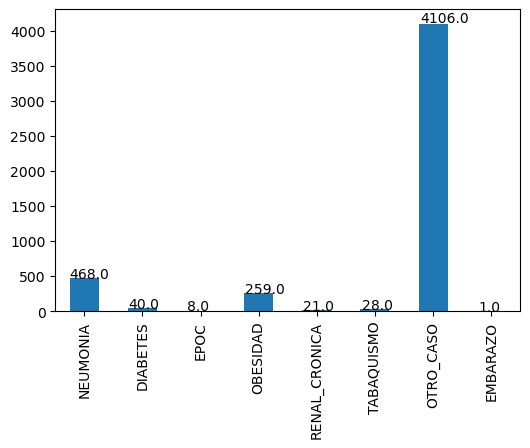

In [27]:
plt.rcParams["figure.dpi"] = 100
ax = row.plot(kind="bar")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

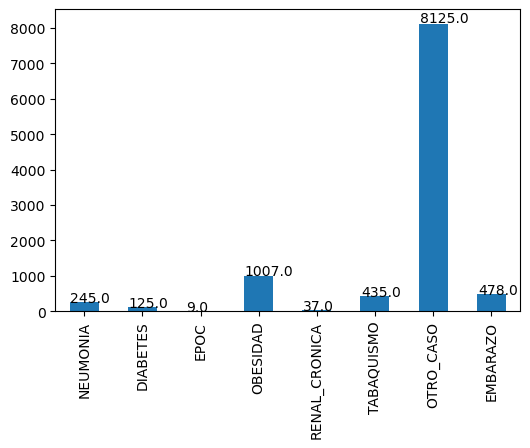

In [28]:
#repetimos lo anterior pero más rápido
dfteenFreq=pd.DataFrame(columns=["NEUMONIA","DIABETES","EPOC","OBESIDAD","RENAL_CRONICA","TABAQUISMO","OTRO_CASO","EMBARAZO"],index=[1,2,97,98,99])

for factor in Factores:
    dfteen.groupby([factor]).count().transpose().loc["FECHA_ACTUALIZACION"]
    dfteenFreq[factor]=dfteen.groupby([factor]).count().transpose().loc["FECHA_ACTUALIZACION"]
dfteenFreq.fillna(0)

rowteen = dfteenFreq.iloc[0]
plt.rcParams["figure.dpi"] = 100
ax = rowteen.plot(kind="bar")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))